In [32]:
from matplotlib import pyplot as plt
import numpy as np

In [177]:
class Build_U:
    def __init__(self,  CFL, T = 18, L = 20, h = 0.5):
        self.T = T
        self.L = L
        self.CFL = CFL
        self.h = h
        self.tau = self.CFL*h
        self.T_v = np.arange(0,T+tau,tau)
        self.X_v = np.arange(0,L+h, h)
        def NU(x):
            return np.sin(4*np.pi*x/L)
        self.u0 = NU(self.X_v)
        self.U = np.ones((len(self.T_v),len(self.X_v)))
        self.U[0] = self.u0
    def Solution_corner(self):
        i = 0
        j = 0
        while i < len(self.T_v)-1:
            j = 1
            while j < len(self.X_v):
                self.U[i+1][j] = self.U[i][j] - self.tau/self.h*(self.U[i][j] - self.U[i][j-1])
                j+=1
            self.U[i+1][0] = self.U[i+1][j-1]
            i+=1
        return self.U
    def Solution_Lax_Vendorf(self):
        i = 0
        j = 0
        def f(k,l,m,p):
            return (self.U[p][l] - self.tau/(2*self.h)*(self.U[p][m] - self.U[p][k]) +
                    self.tau**2/(2*self.h**2)*(self.U[p][m] - 2*self.U[p][l] + self.U[p][k]))
        while i < len(self.T_v)-1:
            j = 1
            while j < len(self.X_v)-1:
                self.U[i+1][j] = f(j-1,j,j+1,i)
                j+=1
            self.U[i+1][j] = f(j-1,j,0,i)
            self.U[i+1][0] = f(j,0,1,i)
            i+=1
        return self.U
    def Raw_for_draw(self, p):
        return (self.U[int(p/self.tau)])

In [214]:
CFL = 0.6
A = Build_U(CFL)
A.Solution_corner()
B = Build_U(CFL)
B.Solution_Lax_Vendorf();

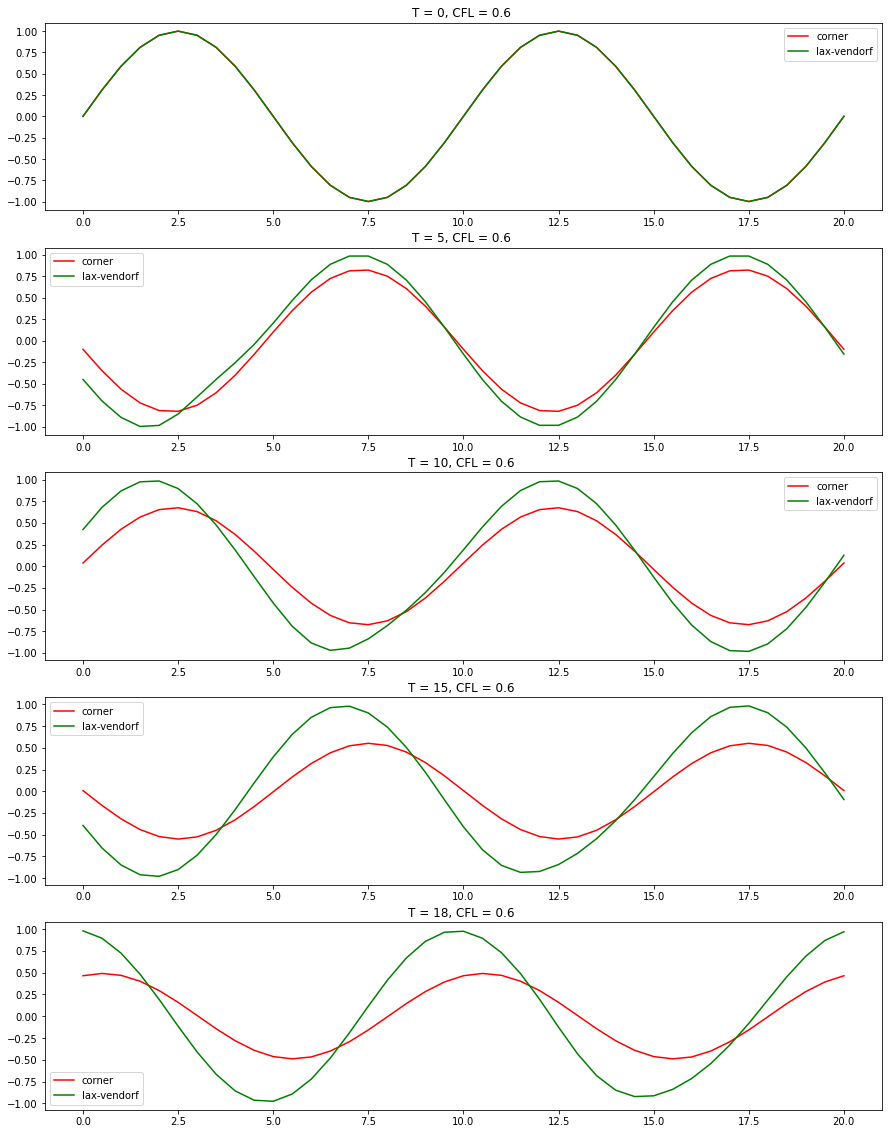

In [215]:
fig, ax = plt.subplots(5, figsize = (15,20))
i = 0
l = [0,5,10,15,18]
while i < 5:
    y = A.Raw_for_draw(l[i])
    y_L = B.Raw_for_draw(l[i])
    ax[i].plot(X, y, color = 'r', label = 'corner')
    ax[i].plot(X, y_L, color = 'g', label = 'lax-vendorf')
    ax[i].set_title('T = {}, CFL = {} '.format(l[i], CFL))
    ax[i].legend()
    i+=1